Allow showing inline Images

In [10]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


Import python and some libraries

In [0]:
import Python
import TensorFlow

In [0]:
let np = Python.import("numpy")
let plt = Python.import("matplotlib.pyplot")
let subprocess = Python.import("subprocess")
let pil = Python.import("PIL")

Download the image

In [3]:
let command = "wget https://cdn.pixabay.com/photo/2014/11/30/14/11/kitty-551554_960_720.jpg -O cat.jpg"
subprocess.call(command, shell: true)

--2019-06-13 16:38:42--  https://cdn.pixabay.com/photo/2014/11/30/14/11/kitty-551554_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.82.97, 104.18.141.87, 2606:4700::6812:8d57, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.82.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117872 (115K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 115.11K  --.-KB/s    in 0.008s  

2019-06-13 16:38:43 (14.6 MB/s) - ‘cat.jpg’ saved [117872/117872]



0


Plot the image

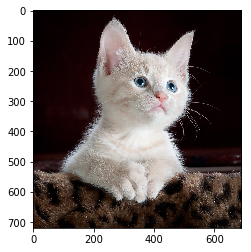

None


In [11]:
let img = pil.Image.open("cat.jpg")
let imgNumpy = np.array(img, np.uint8)
plt.imshow(imgNumpy)
plt.show()

Define Augmentation functions

In [0]:
//preprocess the image by converting 
//to float and expanding the dimnsion
func preprocess(_ tensor:Tensor<UInt8>) -> Tensor<Float> {
  let input = Tensor<Float>(tensor)
  return Raw.expandDims(input, dim: Tensor<Int32>(0))
}

//postprocess the image by resizing to the original size 
//and converting back to uint8
func postprocess(_ tensor:Tensor<Float>) -> Tensor<UInt8> {
  let resized = Raw.resizeArea(images:tensor , size:[720, 689] )
  return Tensor<UInt8>(Raw.squeeze(resized, squeezeDims: [Int32(0)]))
}

//crop to a given size 
func crop(_ tensor:Tensor<UInt8>, _ size:Int) -> Tensor<UInt8> {
  let input = preprocess(tensor)
  let cropped = input[0..<1, 0..<size, 0..<size,0..<3]
  return postprocess(cropped)
}

//flip by switching the axis
func flip(_ tensor:Tensor<UInt8>) -> Tensor<UInt8> {
  let input = preprocess(tensor)
  var flipped = input.transposed(withPermutations: [0, 2, 1, 3])
  return postprocess(flipped)
}


In [0]:
let imgTensor = Tensor<UInt8>(numpy: imgNumpy)!

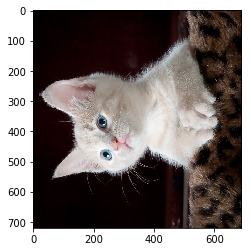

None


In [117]:
plt.imshow(flip(imgTensor).makeNumpyArray())
plt.show()

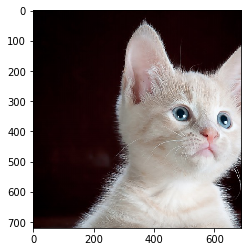

None


In [118]:
plt.imshow(crop(imgTensor, 500).makeNumpyArray())
plt.show()